In [6]:
import os
import numpy as np

## plotting ###
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
PATH = './models/classification_analysis/k500/'

In [8]:
root, _, files = list(os.walk(PATH))[0]
npy_files = [f for f in files if f.split('.')[-1] == 'npy']
npy_files.sort()

cut_off = -1

# Combine the runs and take the average
loss_dict= {}
for npy_file in npy_files:
    
    with open(PATH+npy_file, 'rb') as f:
        losses = np.load(f)
        
        key = npy_file.split('_')[2]
        if key not in loss_dict.keys():
            loss_dict[key] = losses[:cut_off]
        else:
            loss_dict[key] = np.hstack((loss_dict[key], losses[:cut_off]))

In [9]:
(loss_dict['1.00'][:, 2::4] - loss_dict['1.00'][:, 3::4]) .min(axis=0)

array([495.6091875 , 518.85242773, 539.00297266])

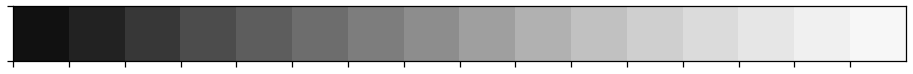

In [10]:
sns.set_context('notebook')
N_COLORS = 16
colors = sns.color_palette('Greys_r', n_colors=N_COLORS)
sns.palplot(colors)

sns.set(font_scale=1.3)
sns.set_style('ticks')

In [11]:
class_loss = loss_dict['1.00'][:, 3::4]

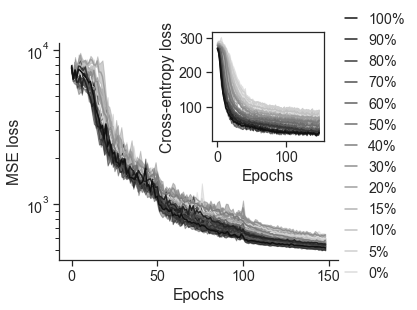

In [12]:
# plot the avg loss for each condition across epochs
fig = plt.figure(figsize=(5,4))
ax = fig.gca()
inset_axis = ax.inset_axes([.55,.55,.4,.5])
# inset_axis.set_frame_on(False)
# xmin, xmax = inset_axis.get_xaxis().get_view_interval()
# ymin, ymax = inset_axis.get_yaxis().get_view_interval()
# inset_axis.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))


k = 12
for key, item in loss_dict.items():
    l = item.shape[0]
    # plot mean classification training loss
    #ax.plot(item[:, 1::4].mean(axis=1), '.', c=colors[k], label='train')
    #ax.fill_between(range(l),item[:, 1::4].mean(axis=1) - item[:, 1:-1:4].std(axis=1), 
    #              item[:, 1::4].mean(axis=1) + item[:, 1:-1:4].std(axis=1), 
    #              color= colors[k], alpha=.5)
    
    # plot mean classification validation loss
    inset_axis.plot(item[:, 3::4].mean(axis=1), c=colors[k])
    inset_axis.fill_between(range(l),item[:, 3::4].mean(axis=1) - item[:, 3::4].std(axis=1), 
                  item[:, 3::4].mean(axis=1) + item[:, 3::4].std(axis=1), 
                  color= colors[k], alpha=.5)
    
    
    # plot mean reconstruction validation loss
    rec_loss = item[:, 2::4] - item[:, 3::4]
    ax.plot(rec_loss.mean(axis=1), c=colors[k],label = '%.f'%(float(key)*100)  +'%')
    ax.fill_between(range(l),rec_loss.mean(axis=1) - rec_loss.std(axis=1), 
                  rec_loss.mean(axis=1) + rec_loss.std(axis=1), 
                  color= colors[k], alpha=.5)
    k -= 1

ax.set_ylabel('MSE loss')
ax.set_xlabel('Epochs')
inset_axis.set_ylabel('Cross-entropy loss')
inset_axis.set_xlabel('Epochs')
ax.set_yscale('log')
sns.despine()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=False, bbox_to_anchor = (.98,1.2), 
          handlelength=.8)
# plt.savefig('./pics/ICML/v5/Fig3/Classification_analysis_msebig.svg', format='svg')

In [33]:
label_fraction  = np.array([1.,.9, .8 ,.7, .6, .5, .4 , .3 , .2 , .15, .1 , .05, 0.])[::-1]

In [41]:
L = np.array(list(loss_dict.values()))
runs, epochs, _ = L.shape
#L = L.reshape(runs, epochs, -1, 4)
# get trial with smallest mean validation loss
#arg_min = L.mean(axis=2)[:,:,2].argmin(axis=1)

In [48]:
rec_loss = L[:,:,2::4] - L[:,:,3::4]
arg_min_0 = np.argmin(rec_loss[0], axis=0)
arg_min_100 = np.argmin(rec_loss[12], axis=0)

In [55]:
print('Rec loss UNsupervised')
print(np.diag(rec_loss[0,arg_min_0]).mean().round())
print(np.diag(rec_loss[0,arg_min_0]).std().round())

print('Rec loss supervised')
print(np.diag(rec_loss[12,arg_min_100]).mean().round())
print(np.diag(rec_loss[12,arg_min_100]).std().round())

Rec loss UNsupervised
588.0
26.0
Rec loss supervised
518.0
18.0


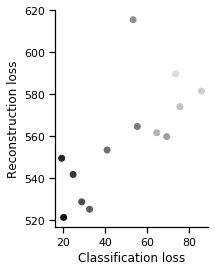

In [45]:
# plot reconstruction loss vs class loss

rec_loss = L[:,:,:,2] - L[:,:,:,3]
plt.scatter(L.mean(axis=2)[range(runs),arg_min,3], np.diag(rec_loss.mean(axis=2)[:,arg_min]), c= colors[:13][::-1])
plt.xlabel('Classification loss')
plt.ylabel('Reconstruction loss')
sns.despine()
plt.gca().set_aspect('equal')

In [37]:
arg_min

array([146, 146, 146, 146, 148, 145, 147, 146, 147, 147, 144, 144, 146])

In [58]:
print(rec_loss[0][arg_min[0]].mean())

rec_loss[0][arg_min[0]].std()

589.8057135416667


26.249261792069394

In [55]:
print(rec_loss[12][arg_min[12]].mean())

rec_loss[12][arg_min[12]].std()#/(np.sqrt(3))

549.6436770833334


1.1585987603807173

In [40]:
np.diag(rec_loss.mean(axis=2)[:,arg_min])

array([589.80571354, 581.62892187, 574.18663281, 561.78912891,
       559.92563021, 615.58011068, 564.75004948, 553.55551563,
       525.36813086, 528.85779688, 541.91588411, 549.64367708,
       521.47192839])

In [12]:
L.mean(axis=2)[:,arg_min,3]

array([[[1.32845186e+03, 6.84849306e+00, 7.93168200e+03, 2.82456469e+02],
        [9.87144509e+02, 6.94239742e+00, 6.54096550e+03, 2.83166698e+02],
        [8.32748222e+02, 6.85452011e+00, 6.92763950e+03, 2.77651073e+02],
        ...,
        [1.05739564e+02, 1.90785268e+00, 6.63365896e+02, 7.35601823e+01],
        [1.04975880e+02, 1.74059277e+00, 6.71578688e+02, 7.47384427e+01],
        [1.04806194e+02, 1.71024660e+00, 6.69842479e+02, 7.48470339e+01]],

       [[1.29776526e+03, 2.98937862e-01, 8.16109600e+03, 2.80861969e+02],
        [9.69852583e+02, 3.15388952e-01, 6.87831850e+03, 2.81306208e+02],
        [7.97768234e+02, 3.10092846e-01, 7.39310917e+03, 2.87085812e+02],
        ...,
        [9.46492480e+01, 6.06010019e-02, 6.67436583e+02, 8.58076615e+01],
        [9.43854497e+01, 7.25998592e-02, 6.70038021e+02, 8.84914219e+01],
        [9.36052636e+01, 9.01522872e-02, 6.75442396e+02, 8.94509401e+01]],

       [[1.28275319e+03, 6.82973705e-01, 7.96930033e+03, 2.84304656e+02],
        

### finetuned model

In [6]:
PATH = './models/M1/m_label/'
root, _, files = list(os.walk(PATH))[0]
npy_files = [f for f in files if f.split('.')[-1] == 'npy']
npy_files.sort()

cut_off = -1

# Combine the runs and take the average
loss_dict= {}
for npy_file in npy_files:
    
    with open(PATH+npy_file, 'rb') as f:
        losses = np.load(f)
        
        key = npy_file.split('_')[2][4:]
        if key not in loss_dict.keys():
            loss_dict[key] = losses[:cut_off]
        else:
            loss_dict[key] = np.hstack((loss_dict[key], losses[:cut_off]))

In [27]:
rec_loss = loss_dict['0.1'][150:, 2::4] - loss_dict['0.1'][150:, 3::4]
arg_min = np.argmin(rec_loss, axis=0)

In [28]:
print(np.diag(rec_loss[arg_min]).mean().round(1))
print(np.diag(rec_loss[arg_min]).std().round(1))

77.4
1.3
